<a href="https://colab.research.google.com/github/BramanTyamahedrawan/PCVK-Pertemuan-10/blob/main/Praktikum_Pertemuan_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA   : BRAMAN TYAMAHENDRAWAN**

**KELAS  : TI-3C**

**NIM    : 2141720097**

**PRAKTIKUM PCVK WEEK 10**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import Library

In [3]:
!pip install pytesseract

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# 2. Load Data

In [5]:
# Load Data gradient
gradient = cv2.imread('/content/drive/MyDrive/PCVK/pertemuan 10/gradient.jpg')
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB)

# 3. Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO TOZERO_INV) dengan Library

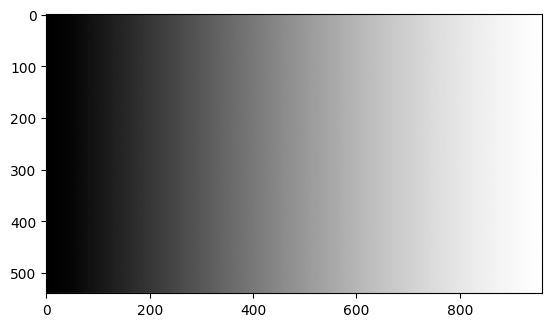

In [6]:
plt.imshow(gradient)

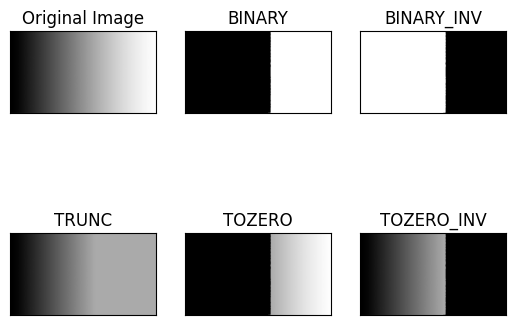

In [7]:
ret,thresh1 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gradient,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
gambar_gradientm4s = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(gambar_gradientm4s[i],'gray',vmin=0,vmax=255)  # vmin vmax untuk mengatur jangkauan intensitas piksel
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # menyembunyikan label sumbu x dan sumbu y

plt.show()

# 4. Otsu's Thresholding

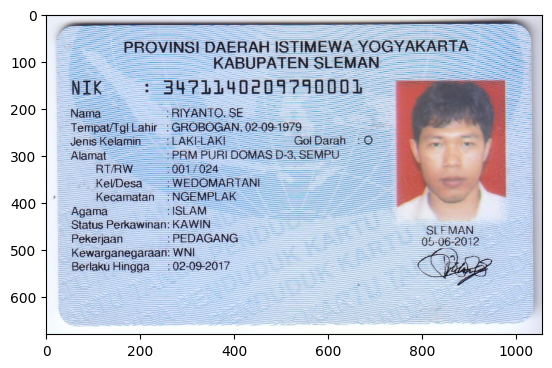

In [8]:
ktp = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
ktp = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)

plt.imshow(ktp)

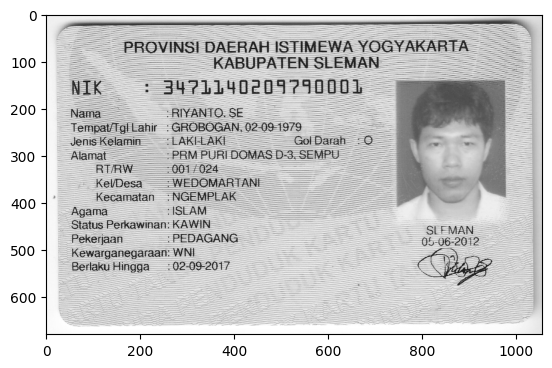

In [9]:
# Ubah citra ke grayscale dengan library
ktp_gray = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png',0)
plt.imshow(ktp_gray, cmap='gray')

167


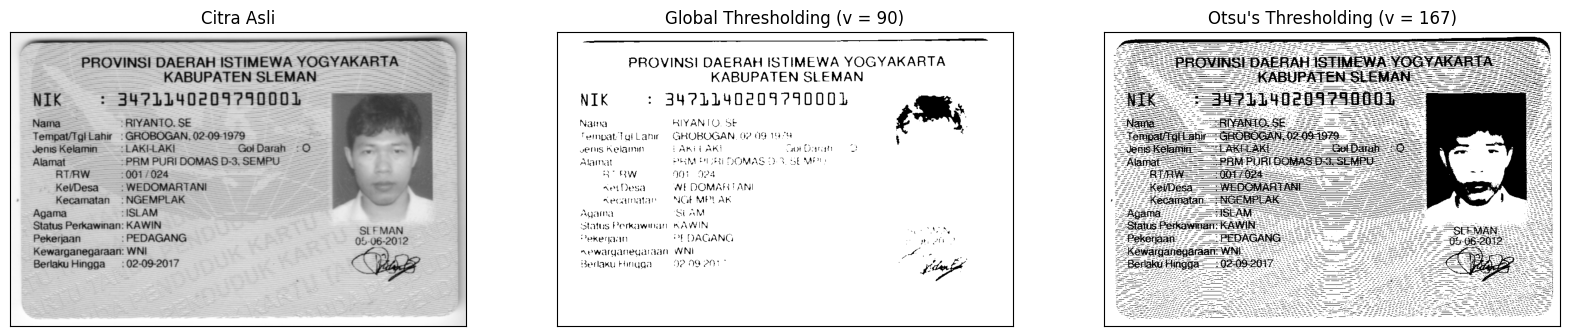

In [11]:
filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)

def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2

    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv2.threshold(blur,90,255,cv2.THRESH_BINARY)
#ret,th2 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

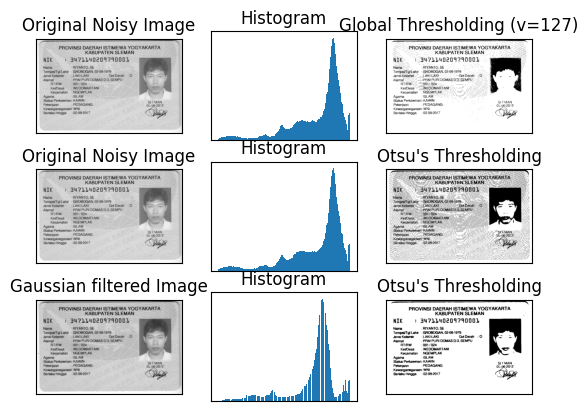

In [12]:
# global thresholding
global_threshold,th1 = cv2.threshold(ktp_gray,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
otsu_threshold,th2 = cv2.threshold(ktp_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(ktp_gray,(5,5),0)
otsu_gaussian,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [ktp_gray, 0, th1,
          ktp_gray, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

# 5. Histogram dari Citra Tersegmentasi (Histogram Foreground saja)

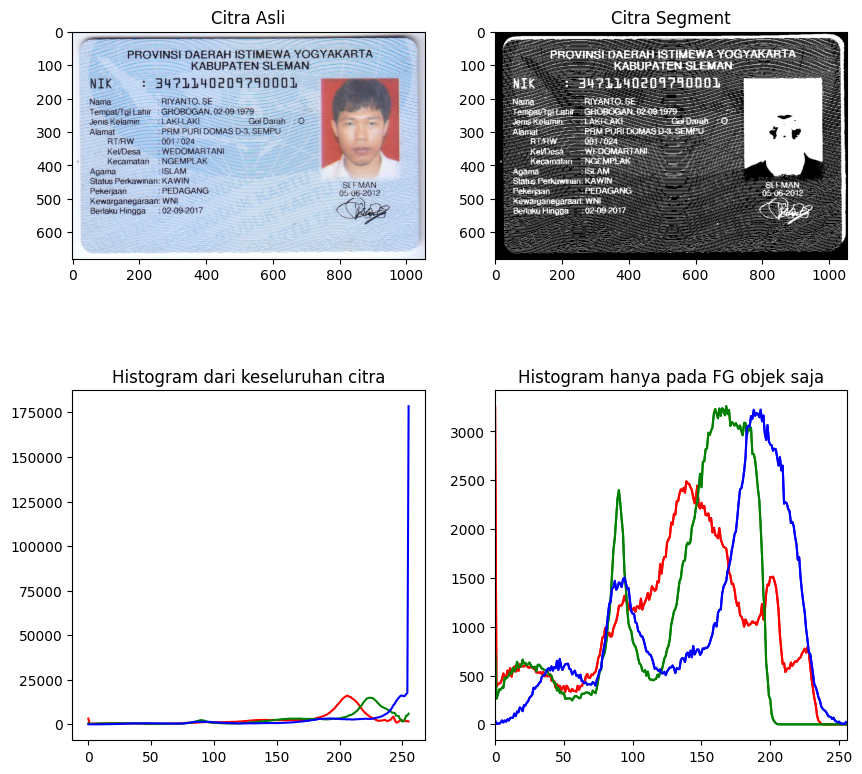

In [13]:
ktp = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img_l = cv2.imread(ktp)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

# 6. Segmentasi Warna pada image 'ktp_riyanto.png'. Munculkan warna biru saja. (K-Means)

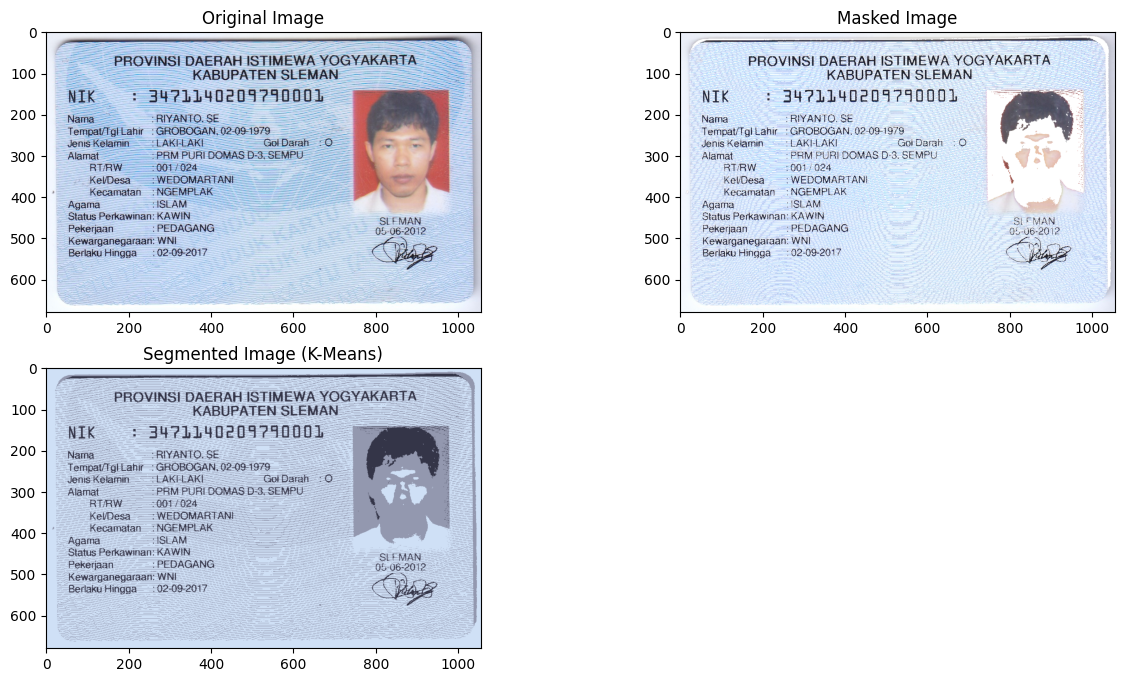

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
ktp = '/content/drive/MyDrive/PCVK/KTP_More/ktp.png'
img = cv2.imread(ktp)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
# K-Means dari library openCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

# **Proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan**

## 1. Install PIP OCR

In [16]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (6,045 kB/s)
debconf: unable to ini

## 2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

## 3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

## 4. Menambahkan kotak untuk deteksi teksi pada gambar

## 5. Hasil pembacaan KTP Menjadi text

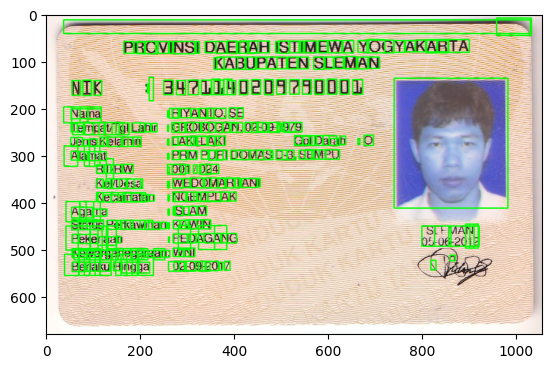

Teks Hasil Pembacaan:
——————————
PROVINS! DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN 7
NIK  : 3471240209790001
Nama /RIYANTO. SE
Tempat/TgtLahir : GROBOGAN, 02-09-1979
Jens Kelamin :LAKILLAKI GolDarah :O ~~ oo.
Alamat : PRM PURI DOMAS D-3, SEMPU.
RTRW 2001 /024
KevDesa  : WEDOMARTANI oC
Kecamatan :NGEMPLAK '
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye
Kewarganegaraan: WNI >
Berlaku Hingga 02-09-2017 Ree



In [19]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import pytesseract

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

# Mengubah gambar menjadi grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Melakukan blurring pada gambar dengan Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
# Melakukan thresholding pada gambar dengan metode Otsu
thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Menentukan nilai alpha dan beta untuk penyesuaian kontras dan kecerahan
alpha = 1.5
beta = 0

# Menyesuaikan kontras dan kecerahan gambar
enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)
# Menentukan konfigurasi untuk Tesseract
custom_config = r'--oem 3 --psm 6'
# Melakukan OCR pada gambar dengan Tesseract
detected_text = pytesseract.image_to_string(enhanced_image, config=custom_config)

# Mendapatkan ukuran gambar
h, w = enhanced_image.shape
# Mendapatkan bounding box untuk setiap karakter pada gambar
boxes = pytesseract.image_to_boxes(enhanced_image)

# Menggambar bounding box untuk setiap karakter pada gambar
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Menampilkan gambar dengan bounding box
plt.imshow(image)
plt.show()

# Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)

# **Tugas implementasi citra dengan Global Thresholding dan hasil ekstrak teks dari KTP**

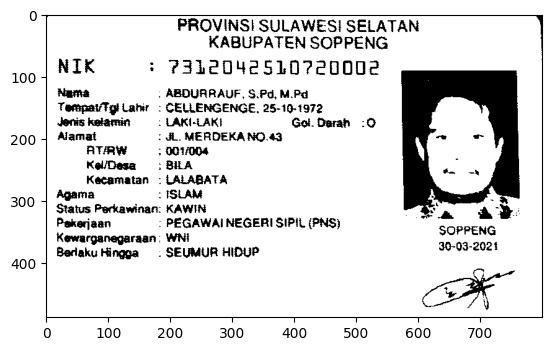


Hasil Ekstrak Teks

PROVINSI SULAWESI SELATAN

KABUPATEN SOPPENG
NIK 1 7312012519720002
Nama : ABDURRAUF, S.Pd, M.Pd
Tempat/Tgi Lahir : CELLENGENGE, 25-19-1972
Jenis kelamin 2 LAKI-LAKI Gol. Darah :0
Alamat 1 JL. MERDEKANO.43
RTAW 3 0017094

KellDeasa BILA
Kecamatan : LALABATA

   

Agama 2 ISLAM 3 K3 An
Status Perkawinan: KAWIN Ta A9:
Pekerjaan : PEGAWAI NEGERI SIPIL (PNS) SOPPENG

Kewarganegaraan: WN

Berlaku Hingga: SEUMUR HIDUP 30-93-2021

Ka



In [20]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

# Baca citra KTP
ktp_img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP7.jpeg')
ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

# Terapkan global thresholding pada citra KTP
global_threshold, ktp_thresholded = cv2.threshold(ktp_gray, 127, 255, cv2.THRESH_BINARY)

# Tampilkan citra hasil thresholding
plt.imshow(ktp_thresholded, cmap='gray')
plt.show()

# Ekstrak teks dari citra hasil thresholding
extracted_text = pytesseract.image_to_string(ktp_thresholded, lang="ind")

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks\n\n"+extracted_text)